# Assignment Module 2: Cross Validation - Ruggiero Julian

## Introduction

Understanding cross-validation as a technique that can be applied during machine learning model training to assess its performance when applied to previously unseen data, the task is to create a cross validated linear regression model that predicts the net hourly electrical energy output of a power plant. <br> <br>
__Goal:__ select a model that perform well on both training data but and unseen data.

The data set that will be used is sourced from the UC Irvine machine learning archive below: <br> <br>
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

__Steps:__ <br>
__1)__ Load the data and read it from my own github repository and perform EDA to understand it and get some insights that might help with the ML model creation.<br>
__2)__ Create at least 2 different linear regression models that can predict __net hourly electrical energy output__ based on some explanatory variables.<br>
__3)__ Evaluate the models using K-fold cross-validation and select the one with the highest accuracy score. <br>
__4)__ Conclusion.

***

## Exploratory Data Analysis

Following the data set information, it contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. Features below consist of hourly average ambient variables:

- Temperature (__T__) in the range 1.81°C and 37.11°C,
- Ambient Pressure (__AP__) in the range 992.89-1033.30 millibar,
- Relative Humidity (__RH__) in the range 25.56% to 100.16%
- Exhaust Vacuum (__V__) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (__EP__) 420.26-495.76 MW

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# statsmodel
import statsmodels.api as sm

C:\Users\julir\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#loading the data from my own github repo
df=pd.read_csv("https://raw.githubusercontent.com/gitjuli/data-science/master/Data/M2_Data.csv")

#sanity check
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
#adding meaningful column names
df.columns = ['temperature', 
                'exhaust_vacuum',
                'ambient_presssure',
                'relative_humidity', 
                'energy_output']

#sanity check
df.head()

,temperature,exhaust_vacuum,ambient_presssure,relative_humidity,energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
#checking dataset shape
df.shape

(9568, 5)

In [5]:
#checking df info, including column data types, and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   ambient_presssure  9568 non-null   float64
 3   relative_humidity  9568 non-null   float64
 4   energy_output      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
#checking summary stats for the 4 explanatory variables
df.iloc[:,:4].describe()

,temperature,exhaust_vacuum,ambient_presssure,relative_humidity
count,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978
std,7.452473,12.707893,5.938784,14.600269
min,1.810000,25.360000,992.890000,25.560000
25%,13.510000,41.740000,1009.100000,63.327500
50%,20.345000,52.080000,1012.940000,74.975000
75%,25.720000,66.540000,1017.260000,84.830000
max,37.110000,81.560000,1033.300000,100.160000


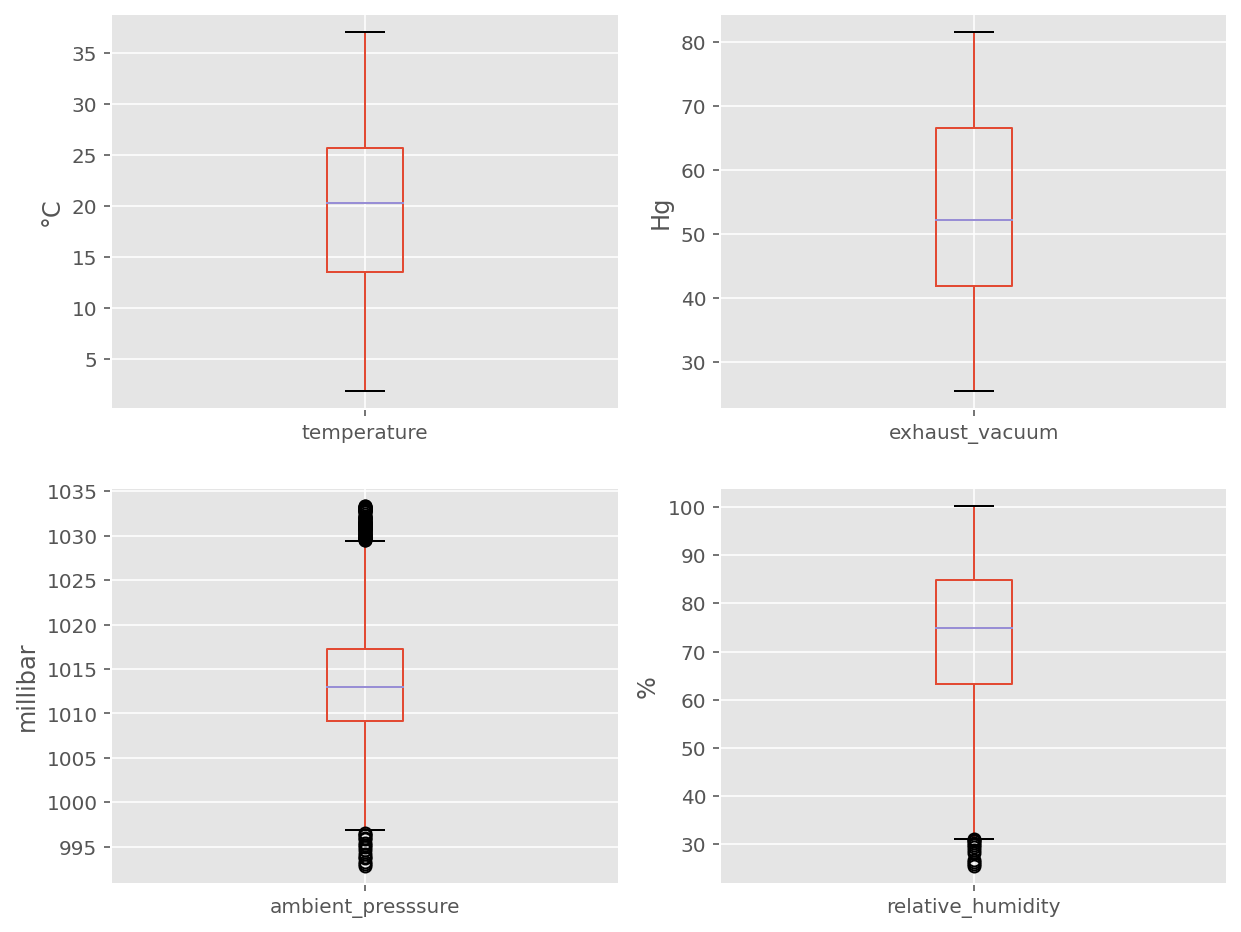

In [7]:
#chequing explanatory variables distributions with boxplots
fig = plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.ylabel('°C')
df.boxplot(column='temperature');

plt.subplot(2, 2, 2)
plt.ylabel('Hg')
df.boxplot(column='exhaust_vacuum');

plt.subplot(2, 2, 3)
plt.ylabel('millibar')
df.boxplot(column='ambient_presssure');

plt.subplot(2, 2, 4)
plt.ylabel('%')
df.boxplot(column='relative_humidity');

The boxplots show a big number of outliers for Ambient_pressure and also Relative_humidity. There is some left skewed on Relative_humidity as the IQR moves to the upper side of the plot.

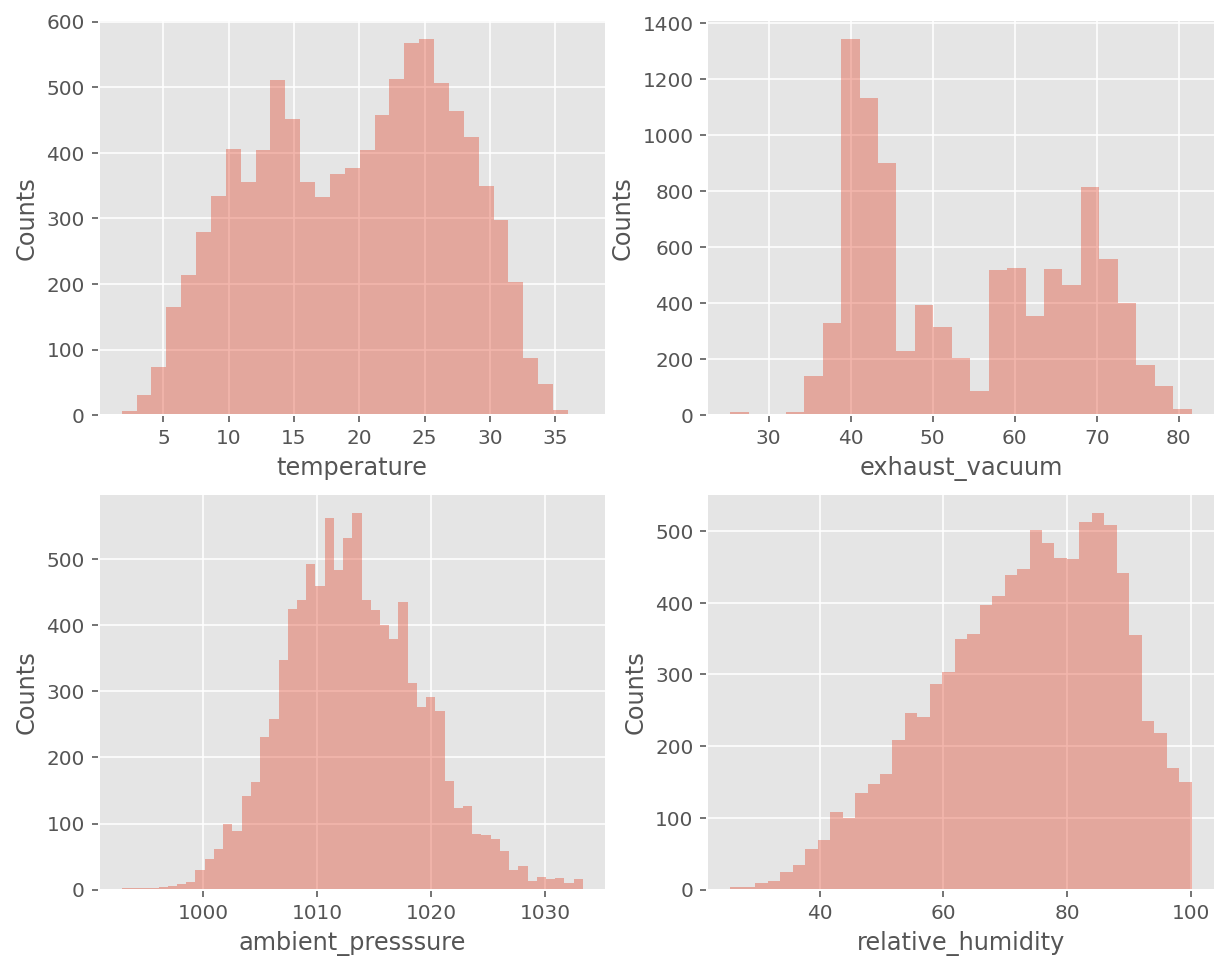

In [8]:
#chequing explanatory variables distributions with histograms
fig = plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
plt.ylabel('Counts')
sns.distplot(df["temperature"], kde=False);

plt.subplot(2, 2, 2)
plt.ylabel('Counts')
sns.distplot(df["exhaust_vacuum"], kde=False);

plt.subplot(2, 2, 3)
plt.ylabel('Counts')
sns.distplot(df["ambient_presssure"], kde=False);

plt.subplot(2, 2, 4)
plt.ylabel('Counts')
sns.distplot(df["relative_humidity"], kde=False);

The distributions confirm the left skewed on Relative_humidity and also show that the distributions do not appear to be nearly normal for the explanatory variables.

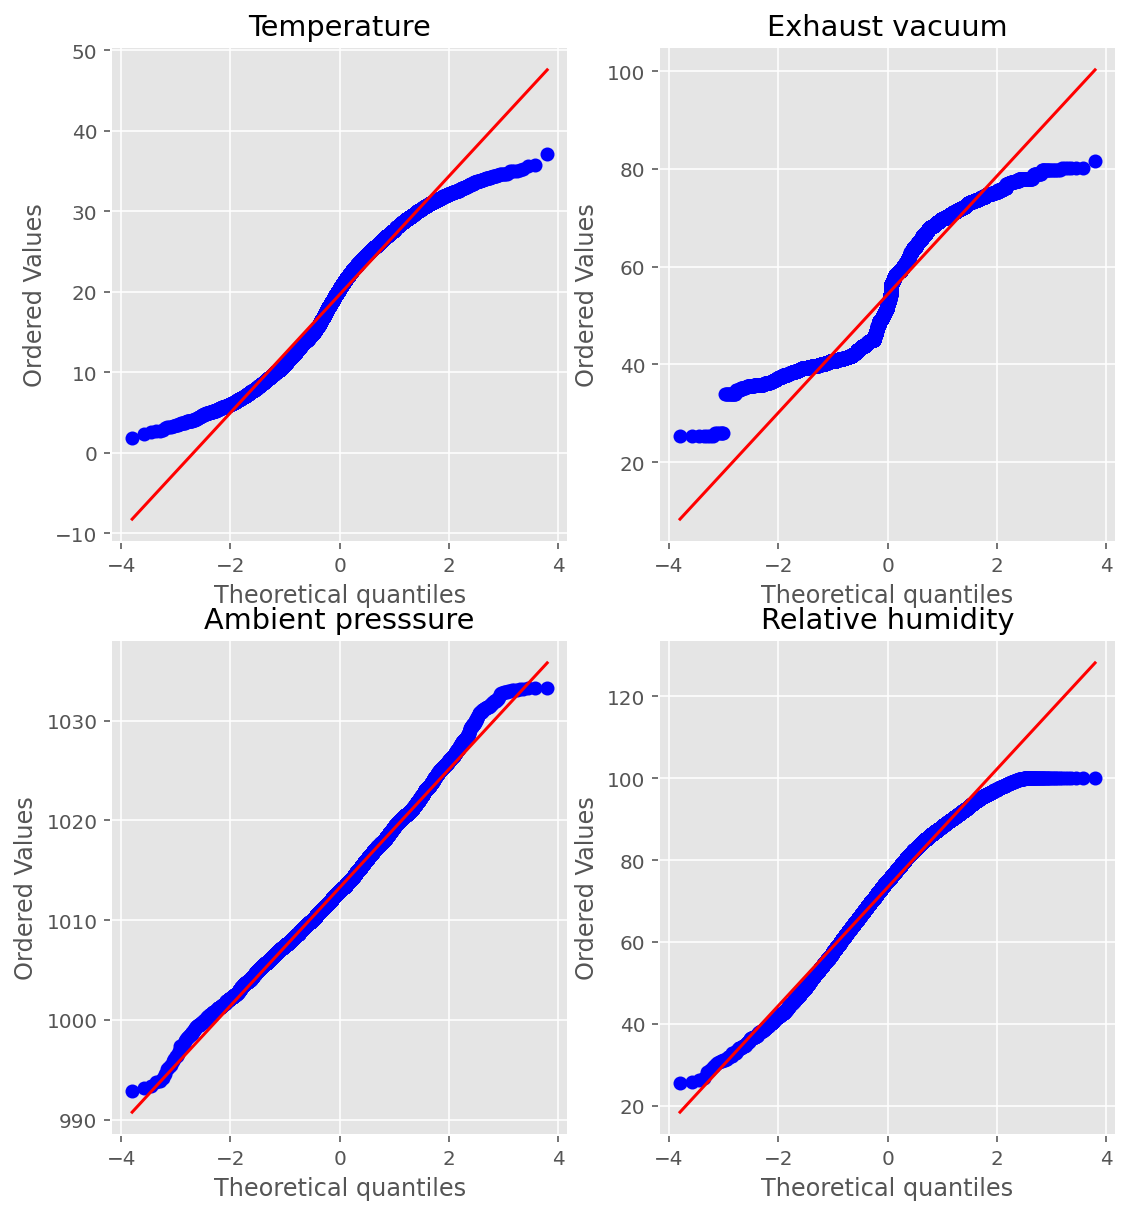

In [9]:
#checking normality condition with probability plots on the 4 explanatory variables
fig = plt.figure(figsize=(9,10))
plt.subplot(2, 2, 1)
probplot(df["temperature"], plot = plt)
plt.title("Temperature")

plt.subplot(2, 2, 2)
probplot(df["exhaust_vacuum"], plot = plt)
plt.title("Exhaust vacuum")

plt.subplot(2, 2, 3)
probplot(df["ambient_presssure"], plot = plt)
plt.title("Ambient presssure")

plt.subplot(2, 2, 4)
probplot(df["relative_humidity"], plot = plt)
plt.title("Relative humidity")
plt.show();

Distributions don't look to be normal, specially for temperature and exhaust vacuum, ambient preasure show some right skewed and relative humidity strong left skewed.

In [10]:
#checking summary stats for the response variable
df.iloc[:,4].describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: energy_output, dtype: float64

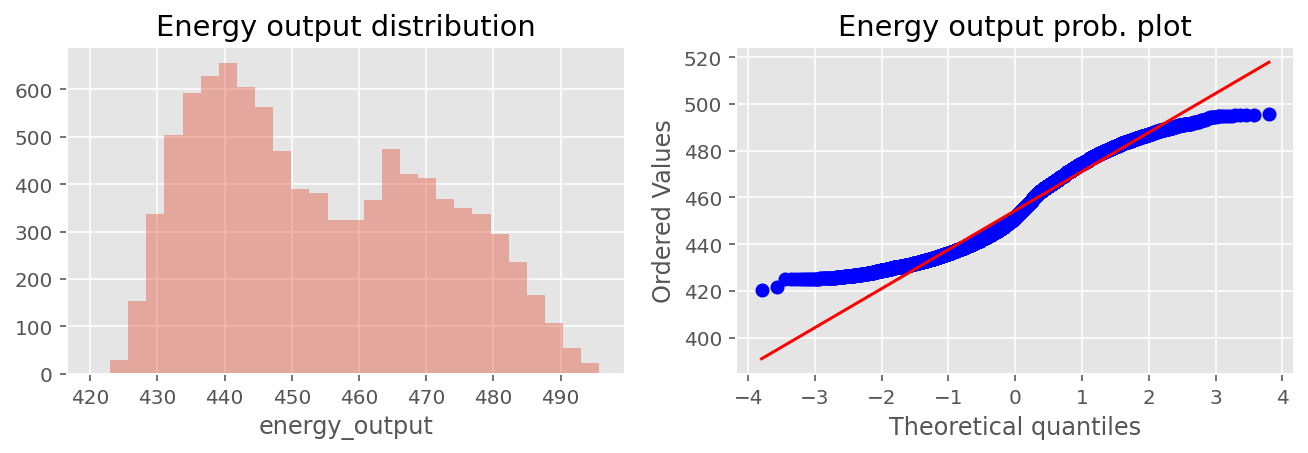

In [11]:
#chequing response variable distribution and normality condition
fig = plt.figure(figsize=(11,3))
plt.subplot(1, 2, 1)
sns.distplot(df["energy_output"], kde=False);
plt.title("Energy output distribution");

plt.subplot(1, 2, 2)
probplot(df["energy_output"], plot = plt);
plt.title("Energy output prob. plot");

The distribution of the response variable does not look to be normal.

In [12]:
#looking at the correlation values between all variables
df.corr()

,temperature,exhaust_vacuum,ambient_presssure,relative_humidity,energy_output
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
ambient_presssure,-0.507549,-0.413502,1.000000,0.099574,0.518429
relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


It seems that both temperature and exhaust-vacuum show a high negative correlation with the hourly energy output, whereas for ambient-pressure and relative-humidity is positive.
Let's see how scatter plots look like.

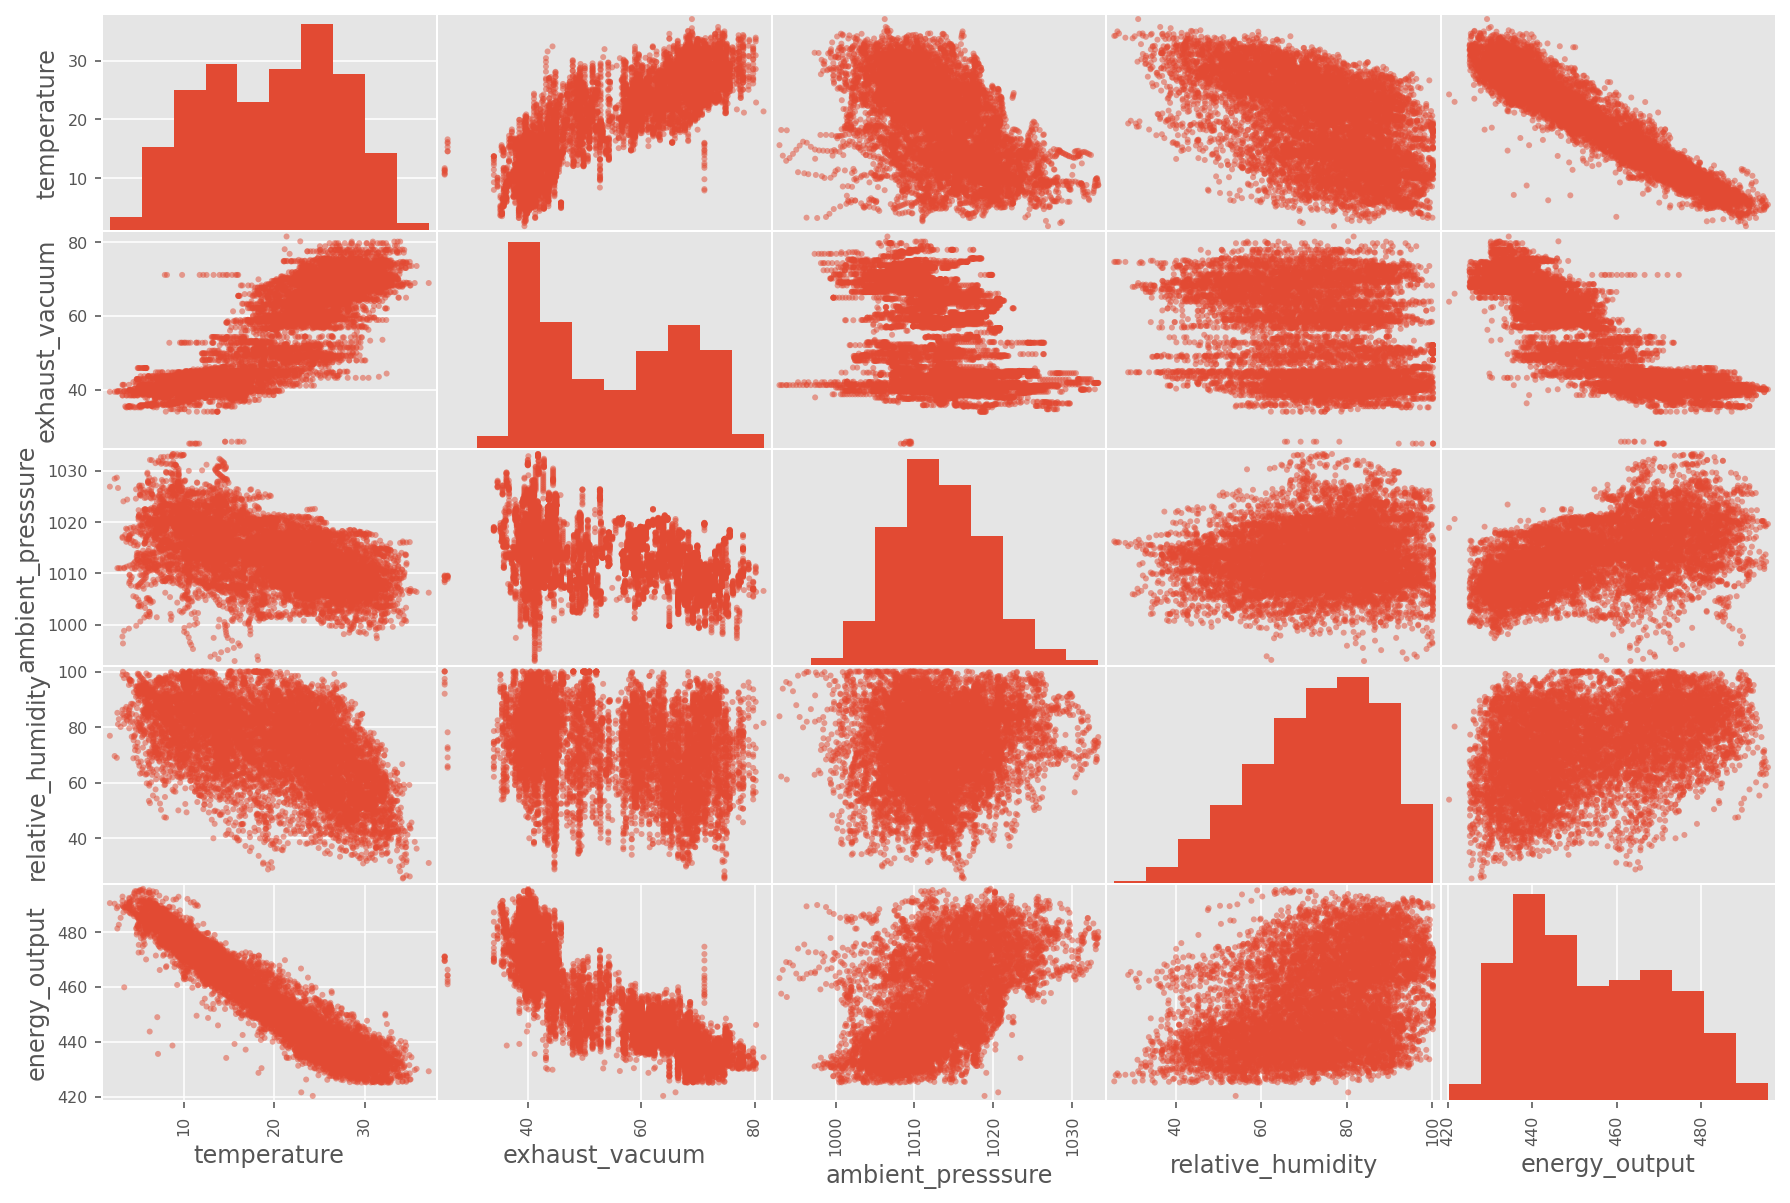

In [13]:
# using pandas scatter_matrix() function to look at correlations
scatter_matrix(df, figsize=(15, 10));

Looking at the graph in the bottom left corner position, it seems that temperature appears to be relatively more predictive of the response variable, the higher the temperature the lower the net hourly electrical energy output. Another promising predictor is the Exhaust_vacuum. <br> Looking closer at each explanatory correlation with the response.

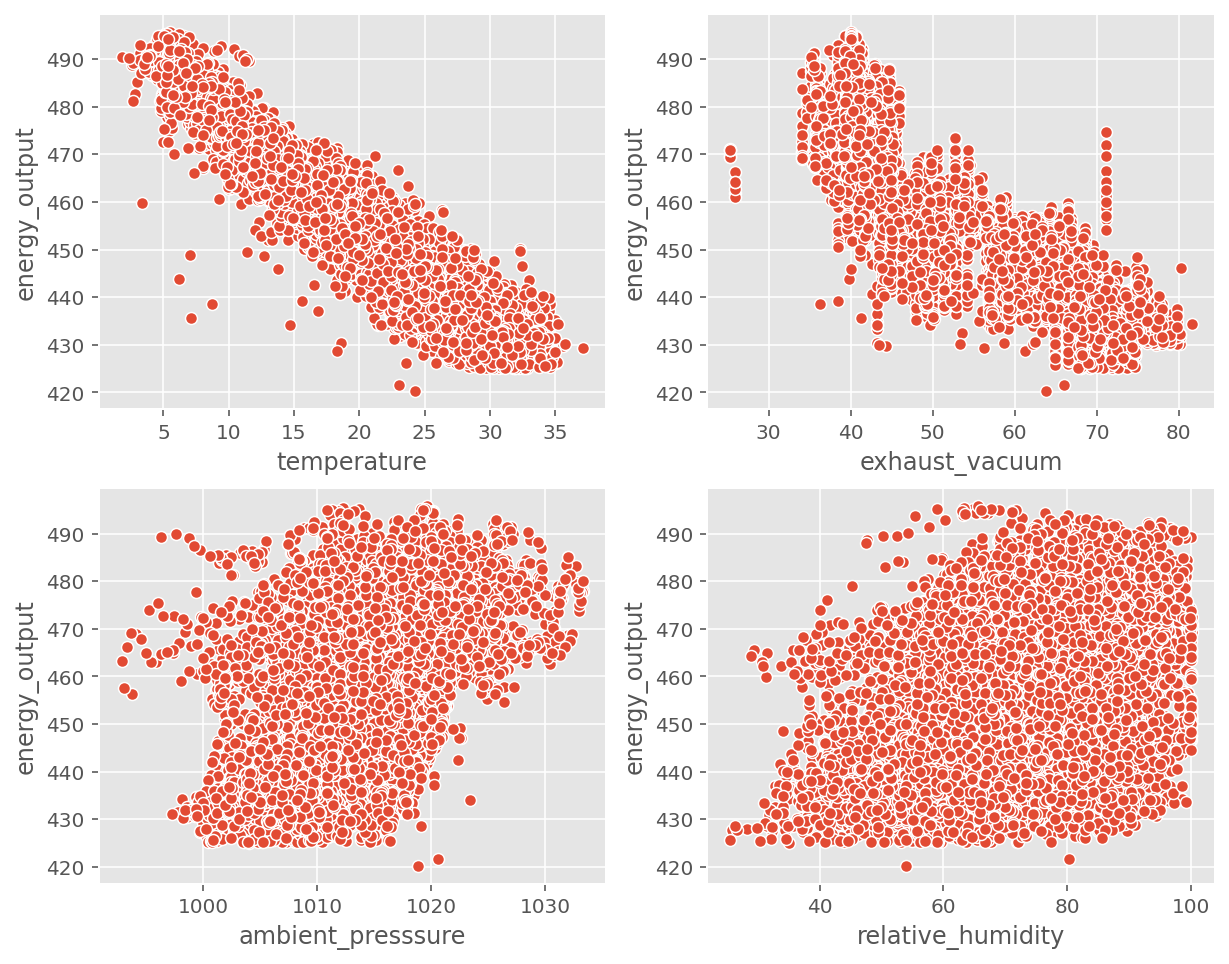

In [14]:
#creating 4 scatter plots between each explanatory variable and the response variable
fig = plt.figure(figsize=(10,8))

#first the 2 with negative correlation
plt.subplot(2, 2, 1)
sns.scatterplot(x = 'temperature', y = 'energy_output', data = df);

plt.subplot(2, 2, 2)
sns.scatterplot(x = 'exhaust_vacuum', y = 'energy_output', data = df);

#then the 2 with positive correlation
plt.subplot(2, 2, 3)
sns.scatterplot(x = 'ambient_presssure', y = 'energy_output', data = df);

plt.subplot(2, 2, 4)
sns.scatterplot(x = 'relative_humidity', y = 'energy_output', data = df);

Here we can see the negative association between temperature and energy output in the top left corner. The other negative association with exhaust vacuum does not look so clear, and the positive ones do not appear to follow a clean trend. Despite association does not imply causation I select temperature to be the most promising predictor.

## Regression Model Construction & Evaluation

### Data splitting

The first step before creating a model would be to split the data to create training and testing sets, but to use scikit-learn prebuilt function, we need to separate the response variable (net hourly electrical energy output).

In [15]:
# move the response variable (Energy-output) to a separate variable
y = df['energy_output']

# checking response variable
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: energy_output, dtype: float64

In [16]:
# create a copy of the original dataframe to preserve it
X = df.copy()

# drop the Energy-output column from 'X' so that the response variable is removed from the explanatory variables
X.drop('energy_output', axis=1, inplace=True)

# sanity check to see that the response variable has been removed
X.head()

,temperature,exhaust_vacuum,ambient_presssure,relative_humidity
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


Temperature is a very important attribute to predict net hourly power out, so I want to ensure that the test set is representative of the various categories/ranges of temperatures in the whole dataset. Since the temperature is a continuous numerical attribute, I first need to create a temperature category attribute, based on bins with a size of 7.

In [17]:
# creating new variable to store the temperature range
X["temperature_cat"] = pd.cut(X["temperature"],
                               bins=[0., 7., 14., 21., 28., 35., np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

# get record value counts
X["temperature_cat"].value_counts()

4    3148
3    2370
2    2235
5    1410
1     398
6       7
Name: temperature_cat, dtype: int64

Now I will use sklearn function __test_test_split()__ and adding a stratified parameter to make sure both the training and testing set is representative of the various temperatures.

In [18]:
# splitting the data into training (70%) and testing subsets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=X["temperature_cat"])

In [19]:
# checking train and test set sizes, original size is nearly 10k so it is ok
len(X_train), len(X_test)

(6697, 2871)

In [20]:
# checking each bin proportion in the test set
X_test["temperature_cat"].value_counts() / len(X_test)

4    0.329154
3    0.247649
2    0.233716
5    0.147335
1    0.041449
6    0.000697
Name: temperature_cat, dtype: float64

In [21]:
# checking each bin proportion in the entire dataset, and they match
X["temperature_cat"].value_counts() / len(X)

4    0.329013
3    0.247701
2    0.233591
5    0.147366
1    0.041597
6    0.000732
Name: temperature_cat, dtype: float64

In [22]:
#remove the income_cat attribute so the data is back to its original state
X.drop(columns=['temperature_cat'], inplace=True)
X_train.drop(columns=['temperature_cat'], inplace=True)
X_test.drop(columns=['temperature_cat'], inplace=True)

C:\Users\julir\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Checking that the indexes match, to make sure the split keep synch between explanatory and response

In [23]:
# training set explanatory variables
X_train.head()

,temperature,exhaust_vacuum,ambient_presssure,relative_humidity
2058,8.05,38.38,1021.14,86.39
6333,7.87,42.85,1012.18,94.21
5812,26.65,74.16,1008.27,94.54
3203,25.31,65.59,1011.16,79.71
759,27.11,69.75,1009.74,85.67


In [24]:
# training set response variable
y_train.head()

2058    482.17
6333    480.54
5812    431.47
3203    440.96
759     433.28
Name: energy_output, dtype: float64

In [25]:
# testing set explanatory variables
X_test.head()

,temperature,exhaust_vacuum,ambient_presssure,relative_humidity
8197,27.58,73.06,1009.63,88.31
1371,25.13,68.63,1013.57,43.44
3852,32.39,79.74,1006.92,58.58
831,9.93,41.62,1013.76,96.02
8086,5.42,41.38,1020.77,86.02


In [26]:
# testing set response variable
y_test.head()

8197    438.10
1371    446.36
3852    430.12
831     464.64
8086    491.38
Name: energy_output, dtype: float64

### Looking at a full model

Before diving into cross-validation, and to understand better each explanatory variable impact on the response I will check the full model and predictors coefficients to confirm some of the EDA findings.

In [43]:
# using statsmodel linear regression to evaluate the each variable contribution
m_full = sm.formula.ols(formula = 'energy_output ~ temperature + exhaust_vacuum + ambient_presssure + relative_humidity', data = df)
multi_reg = m_full.fit()

# printing model summary results
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:          energy_output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        20:11:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           454.6093      9.74

The summary shows that the full model explains 92.9% of the variability in the electrical energy output, and temperature, with a coefficient of -1.9775 is the one that has the highest impact on the response.

### Model Selection with K-fold cross-validation
To estimate the skill of a ML model on unseen data I will use k-fold validation, taking as inputs:

- Insights gained from EDA section using the promising explanatory variables for predicting net electrical energy output.
- Training set from previous/split section.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="400" align="left"> 

K-fold (5-fold in this case) procedure image description, source: https://scikit-learn.org/stable/_images/grid_search_cross_validation.png

As __temperature__ was found during EDA to be a promising predictor for net hourly electrical energy output. Also, there is a high correlation between Temperature and other explanatory variable, 'exhaust_vacuum' (correlation around 0.84), suggesting that both variables might have some collinearity, hence provide similar information, so I will avoid having both of them together in the same model. <br>

In [28]:
# looking at training data length
len(X_train)

6697

I will set the number of folds to be 5, so each train/test sample size is large enough to be statistically representative of the broader dataset.

In [29]:
# Assing the sklearn model function to a variable
# Ordinary least squares Linear Regression.
model = LinearRegression()

In [30]:
# Model1 predictors: 'Temperature' and 'Ambient-presssure', create a new dataframe
X_train_candidate1 = X_train[['temperature', 'ambient_presssure']].copy()

# sanity check
X_train_candidate1.head()

,temperature,ambient_presssure
2058,8.05,1021.14
6333,7.87,1012.18
5812,26.65,1008.27
3203,25.31,1011.16
759,27.11,1009.74


In [31]:
# fit the model using 5-fold cross validation
scores = cross_val_score(model, X_train_candidate1, y_train, cv=5)

# get average accuracy across all 5 folds
mean_score1=np.mean(scores)
mean_score1

0.9009087661951748

In [32]:
# Model2 predictors: 'Temperature' and 'Relative-humidity', create a new dataframe
X_train_candidate2 = X_train[['temperature', 'relative_humidity']].copy()

# sanity check
X_train_candidate2.head()

,temperature,relative_humidity
2058,8.05,86.39
6333,7.87,94.21
5812,26.65,94.54
3203,25.31,79.71
759,27.11,85.67


In [33]:
# fit the model using 5-fold cross validation
scores = cross_val_score(model, X_train_candidate2, y_train, cv=5)

# get average accuracy across all 5 folds
mean_score2=np.mean(scores)
mean_score2

0.9220664840646547

Model 2 has the highest accuracy.

### Select and Train a model

Below the linear regression model is trained using the features from the ones in 'X_train_candidate2' selected previously and the y_train portion of the response variable.

In [36]:
# get column names from the selected model
columns=X_train_candidate2.columns
columns

Index(['temperature', 'relative_humidity'], dtype='object')

In [37]:
# train the model
model.fit(X_train_candidate2, y_train)

LinearRegression()

In [38]:
# get the first 5 records from the training and test test
training_data = X_train_candidate2.iloc[:5]
training_labels = y_train.iloc[:5]

In [39]:
# get 5 predictions as an example
training_predictions=model.predict(training_data)
print("Predictions:", training_predictions)

Predictions: [479.46696101 478.24438081 433.00268243 439.36539867 433.77406492]


In [40]:
# Compare against the actual values:
print("Labels:", list(training_labels))

Labels: [482.17, 480.54, 431.47, 440.96, 433.28]


Predictions in the training set look to be close to the actual values. Let’s measure this regression model’s RMSE on the whole testing set using Scikit-Learn’s mean_squared_error() function:

In [41]:
# getting the root mean square error
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test[columns])
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.842494442563199

In [42]:
# getting mean absolute error
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, predictions)
lin_mae

3.8365402316263206

Considering that net hourly electrical energy output ranges from 420.26-495.76 MW a typical prediction error of 4.84 MW (megawatt) can be considered a good result, however I believe a subject-matter (SME) will need to specify if this is good enough or not for the scope of the model, depending on the scenario of its implementation.

## Conclusion

- The Cycle Power Plant dataset showed 4 different explanatory variables that were analyzed to understand the impact on the response variable 'net hourly electrical energy output'.
- There were several promising predictors for the Cycle Power Plant net hourly electrical energy output, the main one was temperature.
- Before creating a model, a test_split function was applied to the data to have 70% for training and 30% for testing, previous to that stratified sampling was perform to make sure the test set is representative of the various categories/ranges of temperatures in the whole dataset.
- As part of the model selection a 5-fold cross-validation took place to find the best one, where the training set was divided into 5 groups/folds.
- Temperature combined with relative_humidity were the predictors that achieved the highest model accuracy of 0.922.
- Finally, the model selected was trained and predictions took place. Final MSE was 4.84 MW which a subject matter expert will need to define if it is good enough as a model performance indicator.